<p style="text-align: center; font-size: 400%">Devoir MTH2302D </p>

<p style="text-align: center; font-size: 120%">Julien Roux 2060886  
- Sébastien Roy </p>

#### Option génerale pour les graphiques

In [1]:
options(repr.plot.width = 10, repr.plot.height=10, repr.plot.xlab.size=2, repr.plot.ylab.size=2)

### Phase 1

On charge les données depuis le csv en fonction du matricule.

In [2]:
matricule <- 2060886

In [3]:
charger <- function(matricule) {
  set.seed(matricule)
  mondata <- read.csv2("DevoirDH23.csv")[sample(290,195),-1]
}

In [4]:
mondata <- charger(matricule)
mondata[1:5,]

,Sales,Price,Advertising,Region
,<dbl>,<int>,<int>,<int>
25,5.58,148,10,1
181,12.61,104,10,0
202,9.48,132,10,0
129,5.87,109,0,1
289,3.02,90,11,0


On charge toutes les données depuis le csv.

In [5]:
alldata <- read.csv2("DevoirDH23.csv")
alldata[1:5,]

,NUM,Sales,Price,Advertising,Region
,<int>,<dbl>,<int>,<int>,<int>
1,142,5.40,163,13,0
2,104,7.99,99,0,1
3,103,4.21,137,14,0
4,274,4.34,111,0,0
5,286,6.42,126,5,1


### a)

In [6]:
Ventes <- alldata$Sales
# Ventes[1:100]

#### Histogramme du nombre de ventes de siège automobiles

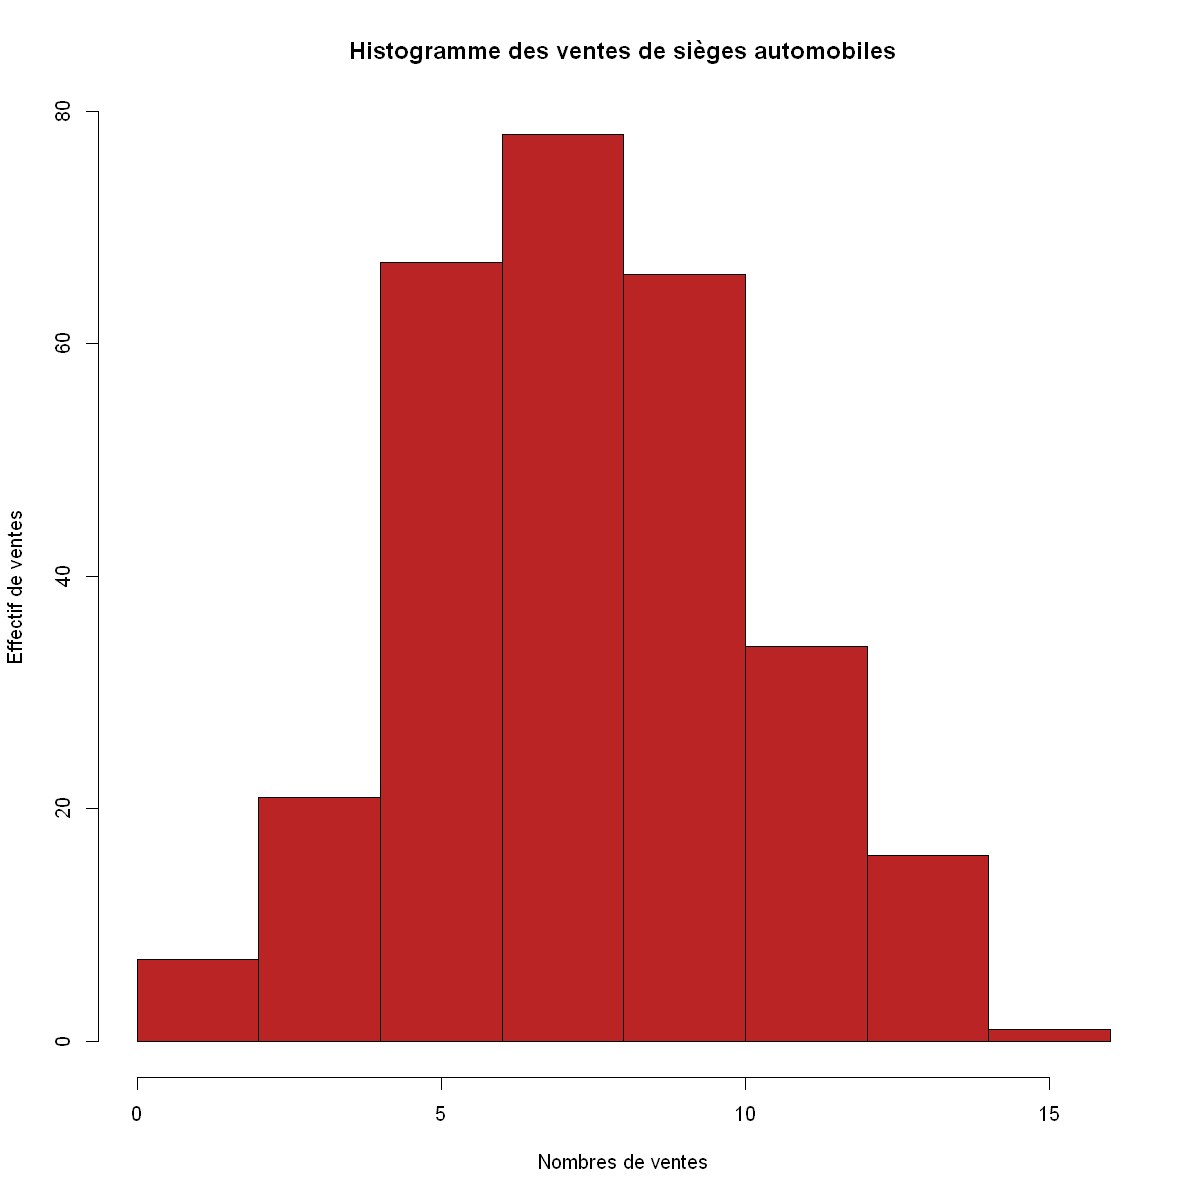

In [7]:
hist(Ventes, col="#bb2424",main="Histogramme des ventes de sièges automobiles",
     border="#000000", xlab="Nombres de ventes",ylab="Effectif de ventes")

Ce graphique montre que la majorité des points de vente ont vendu entre 5 et 10 sièges automobiles.  
<br><br>

#### Box plot du nombre de ventes de siège automobiles

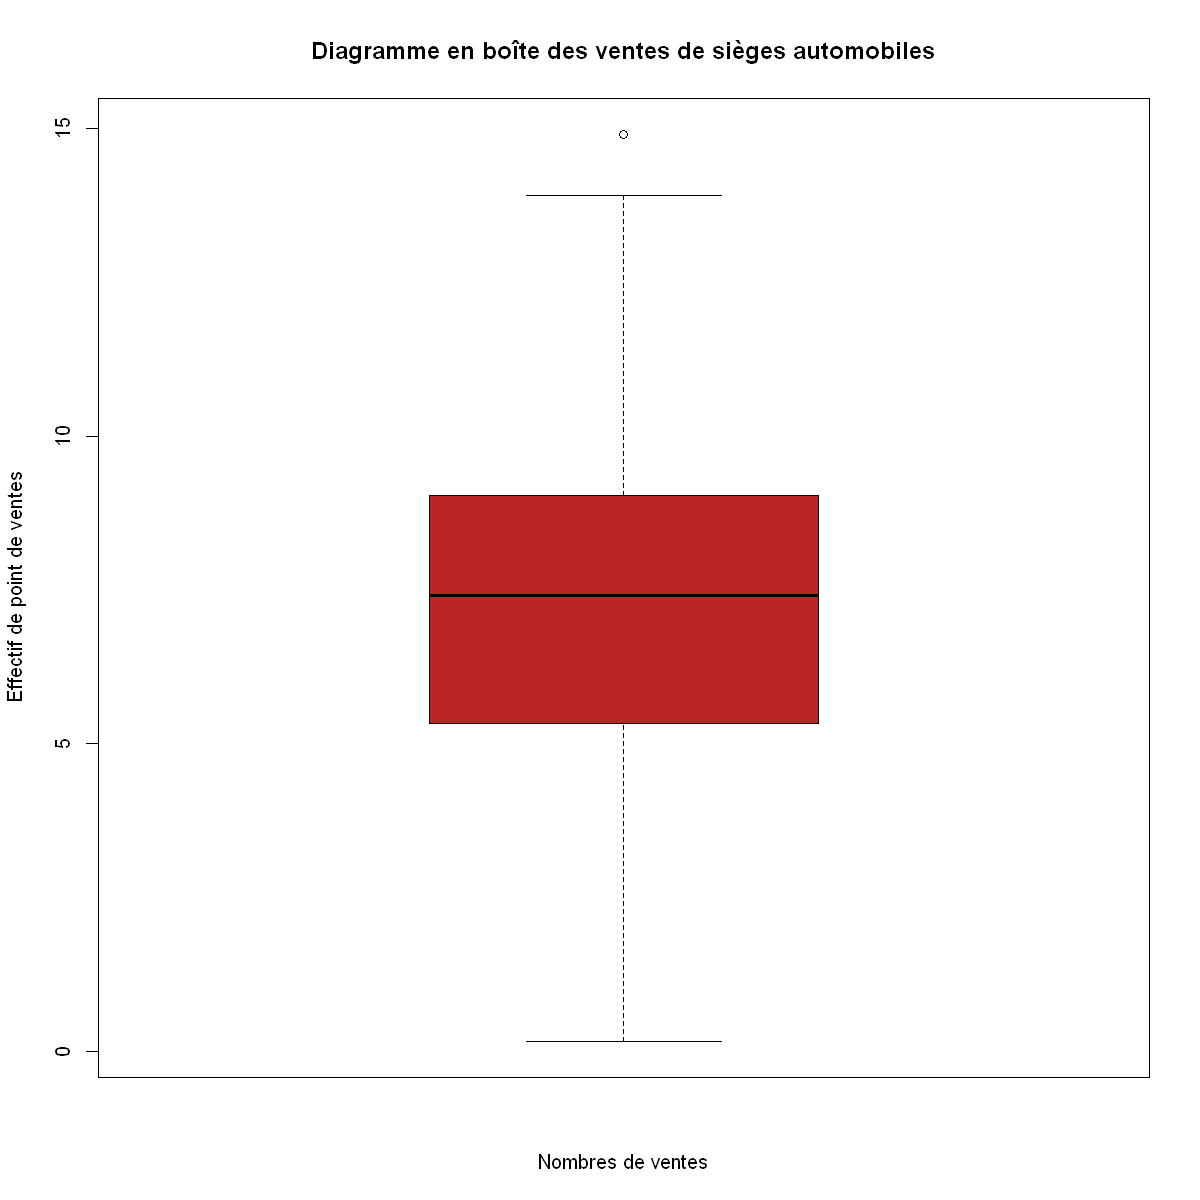

In [8]:
boxplot(Ventes, col="#bb2424",main="Diagramme en boîte des ventes de sièges automobiles",
        border="#000000", xlab="Nombres de ventes",ylab="Effectif de point de ventes")

Ce graphique montre que la moiter des points de vente ont vendu entre 5 et 10 sièges automobiles et que la médiane est d'environ 7,5.  
<br><br>

#### Droite de Henry du nombre de ventes de siège automobiles

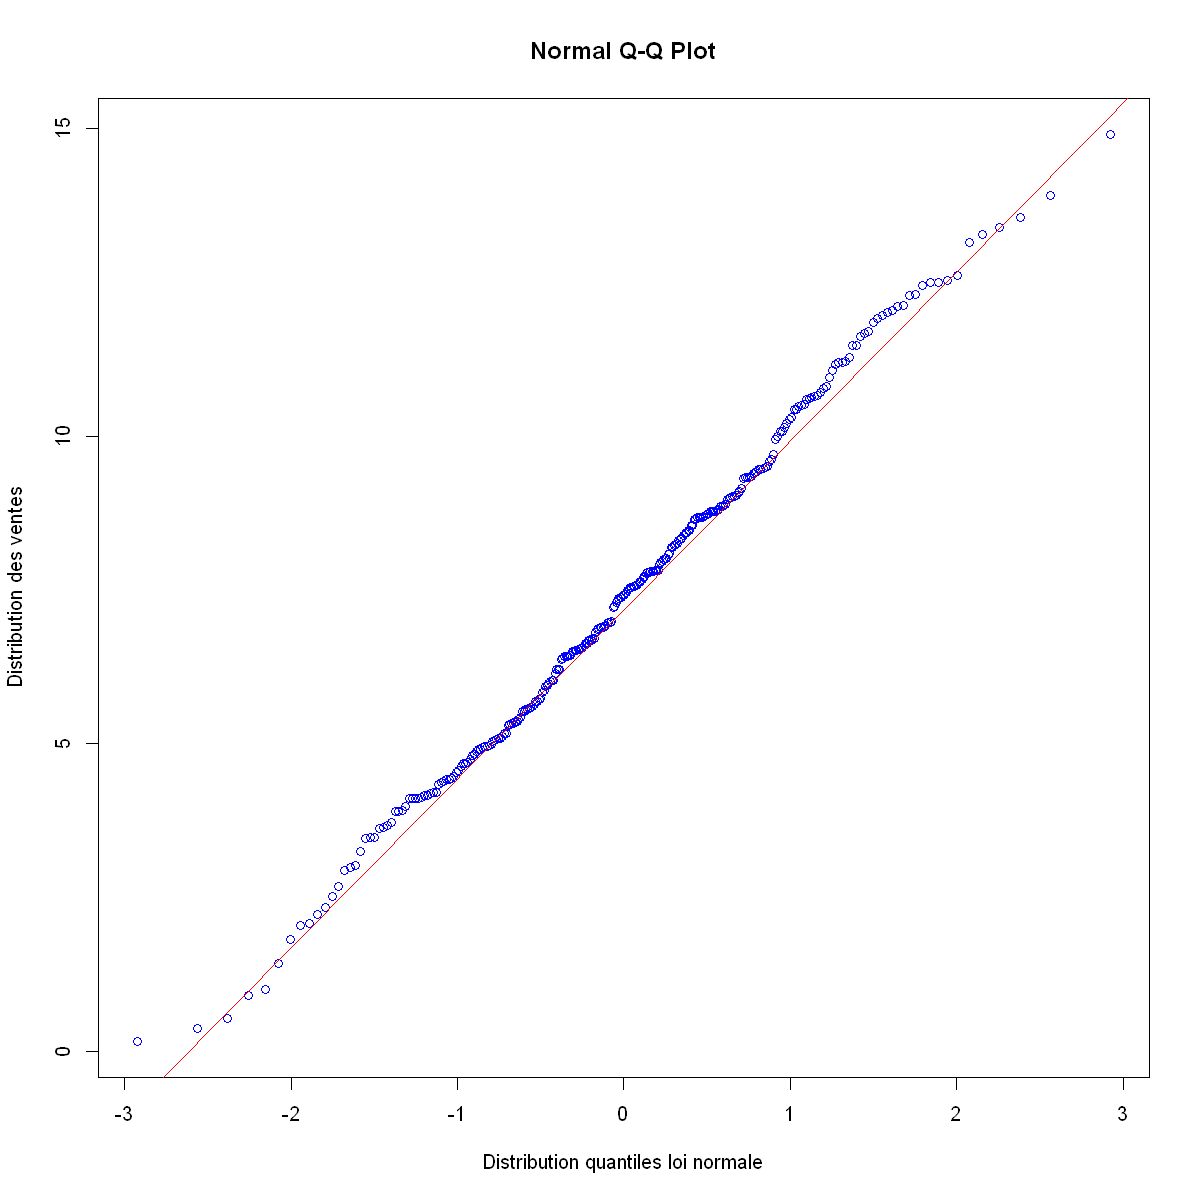

In [9]:
qqnorm(Ventes,col="blue", xlab="Distribution quantiles loi normale",ylab="Distribution des ventes")
qqline(Ventes,col="red")

Les données de ventes semblent suivre une droite de Henry. On peut alors dire que la loi normale est une bonne approximation de la distribution des ventes de sièges automobiles.  
<br><br>

#### Test de normalité du nombre de ventes de siège automobiles

$H_0$: Les données suivent une loi normale  
$H_1$: Les données ne suivent pas une loi normale  

In [10]:
shapiro.test(Ventes)


	Shapiro-Wilk normality test

data:  Ventes
W = 0.99571, p-value = 0.6102


Comme W = 0.99568 n'est pas petit et que p-value = 0.6051 n'est pas petit, on ne rejette pas $H_0$.  
Ainsi le test de normalité montre que les données suivent une loi normale.
<br>
<br>

#### Tableau de statistiques descriptives du nombre de ventes de siège automobiles

Utilisation d'une librarie de R pour le calcule de l'intervalle de confiance à 95% pour la moyenne.

In [11]:
# install.packages("devtools") ; require(devtools)
# devtools::install_github("Antoine-Masse/KefiR")
library(KefiR)
cat('La marge d\'erreur est ', int.pop(Ventes, 0.95))

La marge d'erreur est  0.3186124

Caclule de l'intervalle de confiance à 95% pour la moyenne détailé.

In [12]:
cat('La moyenne des ventes est :', mean(Ventes))
cat('\nLa variance des ventes est :', var(Ventes))
cat('\nTaille de la population : n =', length(Ventes))

La moyenne des ventes est : 7.346793
La variance des ventes est : 7.663499
Taille de la population : n = 290

Calcul intervale de confiance à 95% (1 - $\alpha$ = 0.95) pour la moyenne de la population.  
$\bar{X}$ = 7.343 et $\sigma^2$ = 7.71, de plus Ventes ~ N($\mu$, $\sigma^2$).  
On a donc: $\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$ ~ N(0, 1) soit $\mu \in \bar{X} \pm z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$  
<br> 
Calcul $z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$

In [13]:
z <- qnorm(0.025, 0, 1, lower.tail = FALSE) * sqrt(var(Ventes)/length(Ventes))
cat('\nLa marge d\'erreur est :', z)



La marge d'erreur est : 0.3186124

On à donc: $\mu \in \bar{X} \pm 0.3195956$ soit $\mu \in [7.023404, 7.662596]$ à 95%.    
<br>
<br>

Tableau de statistiques :

In [14]:
stat <- matrix(c(
    summary(Ventes)[['1st Qu.']],
    summary(Ventes)[['Median']],
    summary(Ventes)[['Mean']],
    sqrt(var(Ventes)),
    summary(Ventes)[['3rd Qu.']],
    paste("[", 7.023404, ", ",  7.662596, "]", sep = "")),
    ncol=6,
    nrow=1,
    byrow=TRUE)

colnames(stat) <- c('1er Quartile','Médiane','Moyenne','Écart type', '3e Quartile', 'Intervale de confiance')
stat

1er Quartile,Médiane,Moyenne,Écart type,3e Quartile,Intervale de confiance
5.3225,7.415,7.34679310344828,2.76830261510739,9.025,"[7.023404, 7.662596]"


### b)

#### On extrait les données de ventes de sièges automobiles pour chaque région

In [15]:
ventesRegion1 <- alldata[alldata$Region == 0,]$Sales
ventesRegion2 <- alldata[alldata$Region == 1,]$Sales
ventesRegion1[1:5]
ventesRegion2[1:5]

[1] 5.40 4.21 4.34 5.61 8.89

[1] 7.99 6.42 3.47 4.97 6.68

#### On crée un nouveau dataframe avec les données de ventes de sièges automobiles avec une colonne pour différencier les régions.

In [16]:
combineSales <- rbind(
    data.frame(
        Region = "Region 1",
        Ventes = ventesRegion1
    ),
    data.frame(
        Region = "Region 2",
        Ventes = ventesRegion2
    )
)
combineSales[1:5,]

,Region,Ventes
,<chr>,<dbl>
1,Region 1,5.40
2,Region 1,4.21
3,Region 1,4.34
4,Region 1,5.61
5,Region 1,8.89


#### Histogramme du nombre de ventes de siège automobiles par point de vente en fonction de la région

Warning message:
"le package 'ggplot2' a été compilé avec la version R 4.2.3"


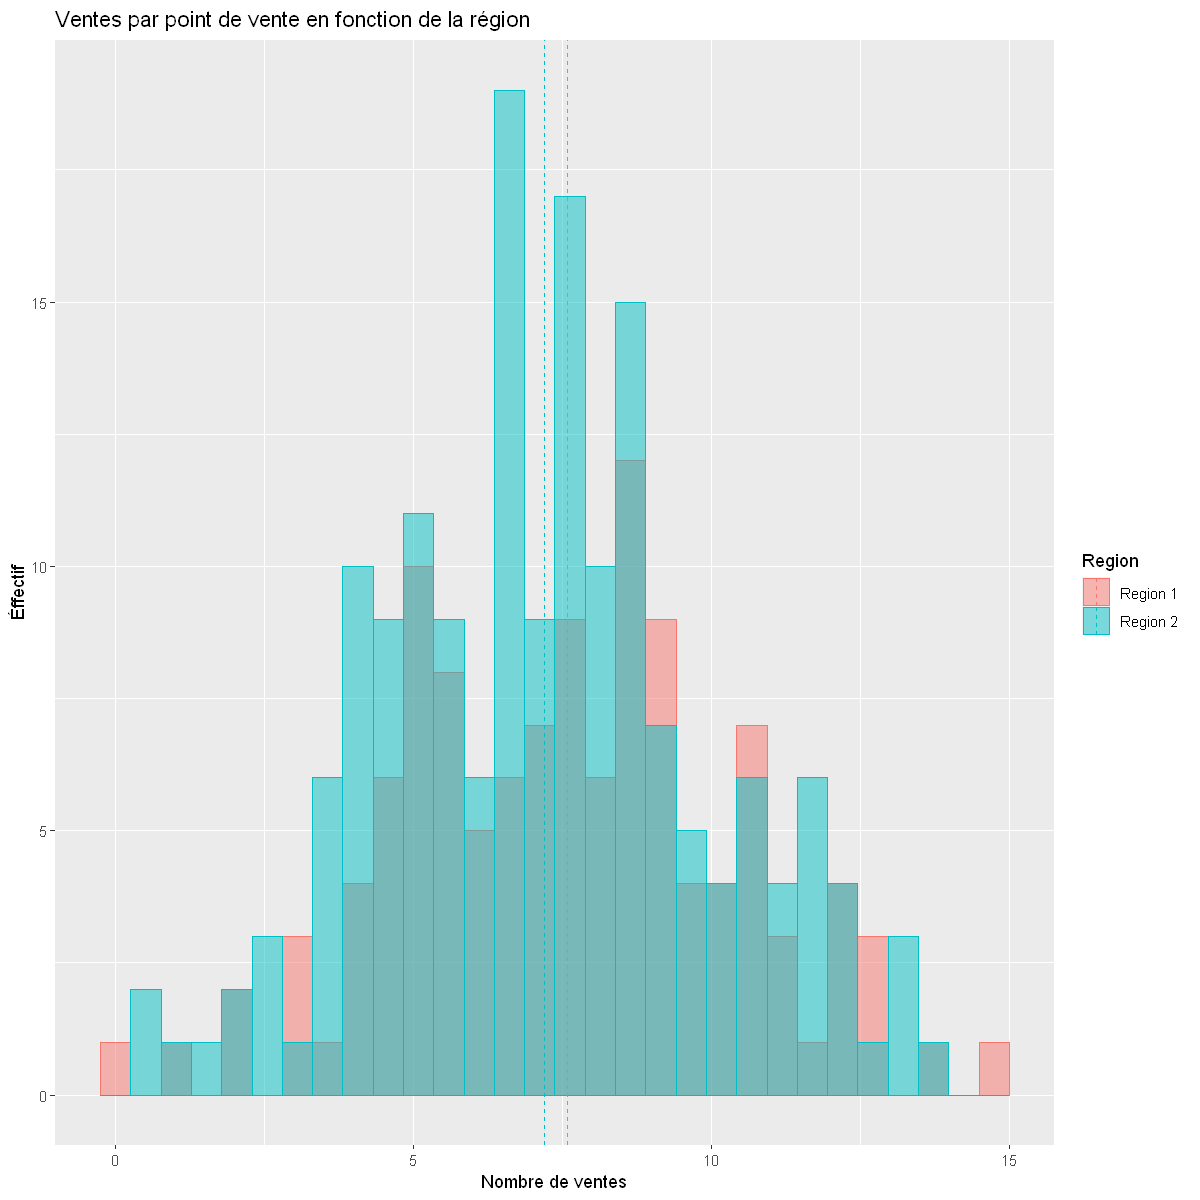

In [17]:
library(ggplot2)

# options(repr.plot.width=7, repr.plot.height=7, repr.plot.xlab.size=2, repr.plot.ylab.size=2)

hist <- ggplot(combineSales, aes(x=Ventes, fill=Region, color=Region)) +
  geom_histogram(bins = 30, alpha=0.5, position="identity") +
  labs(title="Ventes par point de vente en fonction de la région",x="Nombre de ventes", y = "Éffectif")

moy <- data.frame(
    grp.mean = c(mean(ventesRegion1), mean(ventesRegion2)),
    Region = c("Region 1", "Region 2")
)
hist+geom_vline(data=moy, aes(xintercept=grp.mean, color=Region),
             linetype="dashed")

#### Box plot du nombre de ventes de siège automobiles en fonction de la région

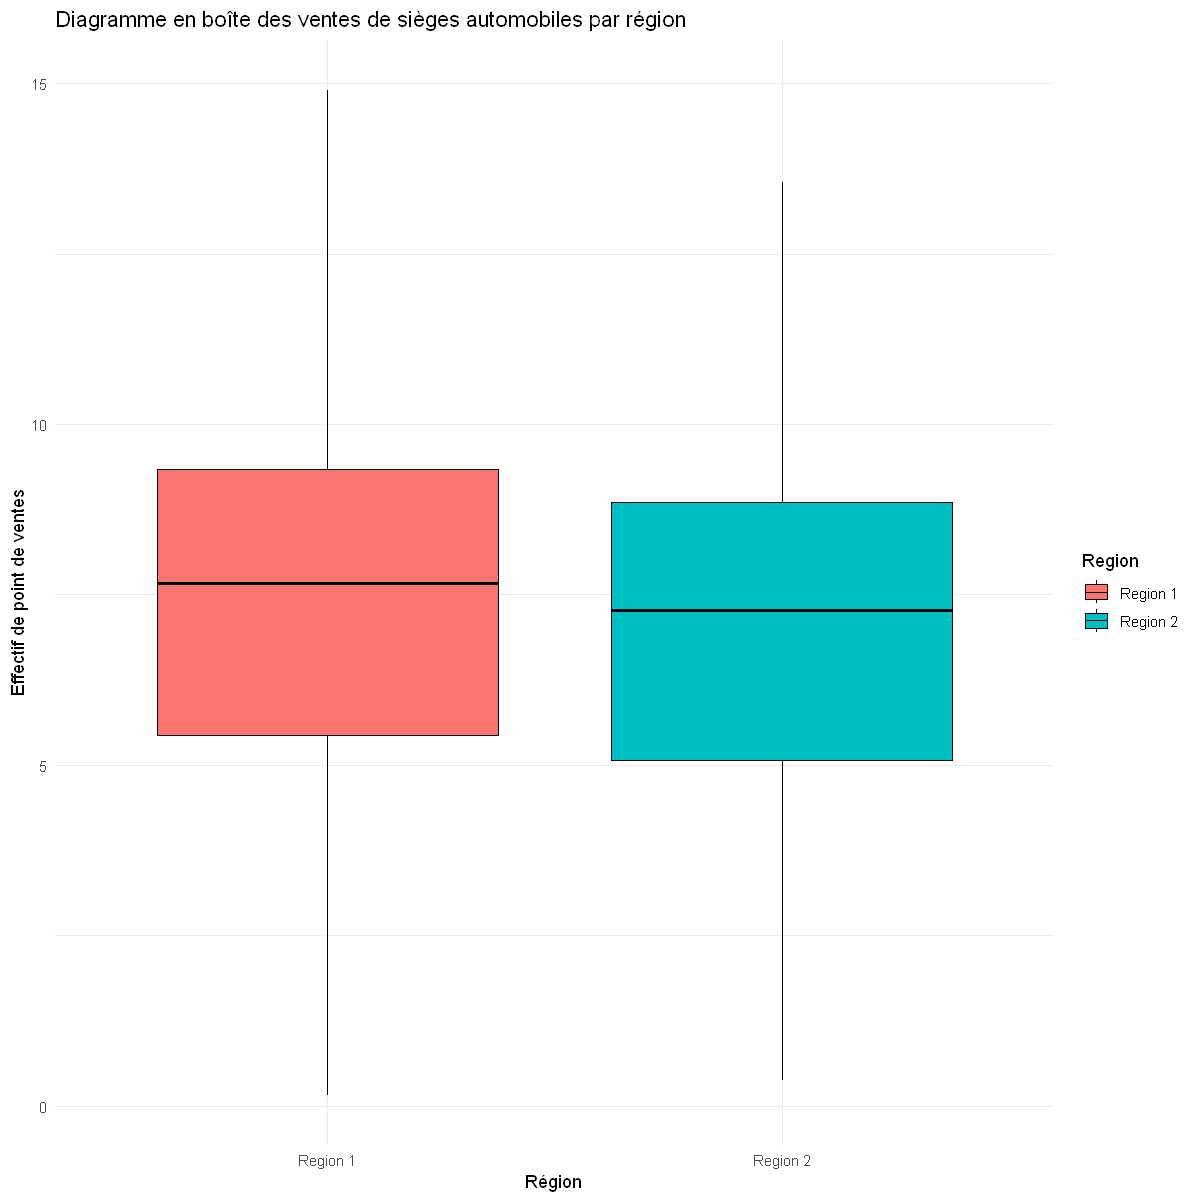

In [18]:
ggplot(combineSales, aes(x=Region, y=Ventes)) +
    geom_boxplot(aes(fill=Region), color="black") +
    theme_minimal() +
    labs(title="Diagramme en boîte des ventes de sièges automobiles par région",
         x="Région", y="Effectif de point de ventes")

#### Tableau de statistiques descriptives du nombre de ventes pas point de vente en fonction de la région

In [19]:
statRegion <- matrix(c(
    0,
    summary(ventesRegion1)[['1st Qu.']],
    summary(ventesRegion1)[['Median']],
    summary(ventesRegion1)[['Mean']],
    sqrt(var(ventesRegion1)),
    summary(ventesRegion1)[['3rd Qu.']],
    paste("[", round(summary(ventesRegion1)[['Mean']] - int.pop(ventesRegion1, 0.95), 3), ", ",  round(summary(ventesRegion1)[['Mean']] + int.pop(ventesRegion1, 0.95), 3), "]", sep = ""),
    
    1,
    summary(ventesRegion2)[['1st Qu.']],
    summary(ventesRegion2)[['Median']],
    summary(ventesRegion2)[['Mean']],
    sqrt(var(ventesRegion2)),
    summary(ventesRegion2)[['3rd Qu.']],
    paste("[", round(summary(ventesRegion2)[['Mean']] - int.pop(ventesRegion2, 0.95), 3), ", ",  round(summary(ventesRegion2)[['Mean']] + int.pop(ventesRegion2, 0.95), 3), "]", sep = "")),
    ncol=7,
    nrow=2,
    byrow=TRUE)

colnames(statRegion) <- c('Région','1er Quartile','Médiane','Moyenne','Écart type', '3e Quartile', 'Intervale de confiance')

statRegion

Région,1er Quartile,Médiane,Moyenne,Écart type,3e Quartile,Intervale de confiance
0,5.44,7.67,7.57203389830508,2.78423355910771,9.335,"[7.07, 8.074]"
1,5.0775,7.265,7.19226744186046,2.75477131611318,8.8525,"[6.781, 7.604]"


# TODO : INTERPRÉTATION

### Test d'hypotheses sur la variance des deux régions

$H_0$ : $\sigma_1^2 = \sigma_2^2$  
$H_1$ : $\sigma_1^2 \neq \sigma_2^2$

In [20]:
varTest <- var.test(Ventes ~ Region , data=alldata, alternative = "two.sided", paired = FALSE)
varTest
cat('La p-value est :', varTest$p.value)


	F test to compare two variances

data:  Ventes by Region
F = 1.0215, num df = 117, denom df = 171, p-value = 0.8919
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7353614 1.4340909
sample estimates:
ratio of variances 
          1.021504 


La p-value est : 0.891923

Comme p-value = 0.891923 > $\alpha = 0.05$, on ne rejette pas $H_0$ donc le test sur les variances montre que les deux régions ont des variances que ne diffèrent pas significativement au seuil $\alpha$ = 5%.	

#### Démarche détaillée : 

In [21]:
varRegion1 = var(ventesRegion1)
varRegion2 = var(ventesRegion2)
n1 = length(ventesRegion1)
n2 = length(ventesRegion2)

$H_0$ : $\sigma_1^2 = \sigma_2^2$  
$H_1$ : $\sigma_1^2 \neq \sigma_2^2$  
$f_0$ : $\frac{s_1^2}{s_2^2}$

On rejete $H_0$ si $F_{1-\frac{\alpha}{2}},n_1 - 1, n_2 - 1 > f_0$  ou $F_{\frac{\alpha}{2}},n_1 - 1, n_2 - 1 < f_0$

In [22]:
f0 = varRegion1/varRegion2
f0

[1] 1.021504

 $F_{1-\frac{\alpha}{2}},n_1 - 1, n_2 - 1$ = 0.71 < $f_0$ = 1.021, On ne peut conclure pour l'insant.

In [23]:
Fg = qf(1 - 0.025, n1 - 1, n2 - 1, lower.tail = FALSE)
Fg

[1] 0.712301

$F_{\frac{\alpha}{2}},n_1 - 1, n_2 - 1 $  = 1.389 > $f_0$ = 1.021, Les critères de rejet ne sont pas respectés donc $H_0$ est accepté.

In [24]:
Fd = qf(0.025, n1 - 1, n2 - 1, lower.tail = FALSE)
Fd

[1] 1.389119

### Test d'hypotheses sur l'égalité des moyennes des deux régions

$H_0$ : $\mu_1 = \mu_2$  
$H_1$ : $\mu_1 \neq \mu_2$

In [25]:
moyTest <- t.test(Ventes ~ Region , data=alldata, alternative = "two.sided", paired = FALSE)
moyTest


	Welch Two Sample t-test

data:  Ventes by Region
t = 1.146, df = 249.83, p-value = 0.2529
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.2728957  1.0324287
sample estimates:
mean in group 0 mean in group 1 
       7.572034        7.192267 


Comme p-value = 0.2529 > $\alpha = 0.05$, on ne rejette pas $H_0$ donc le test sur les moyennes montre que les deux régions ont des moyennes que ne diffèrent pas significativement au seuil $\alpha$ = 5%.	
<br>
<br>
<br>


## Phase 2 : Recherche du meilleur modèle

### c)

#### Modèle 1 --- $Y = \beta_0 +\beta_1 X_1 + \epsilon$

In [26]:
linModel1 <- lm(alldata$Sales~ alldata$Price)
summaryLinModel1 <- summary(linModel1)

Tableau coefficient de regression


In [27]:
summaryLinModel1$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),13.61300354,0.755228827,18.025005,3.773104e-49
alldata$Price,-0.05424157,0.006414514,-8.456068,1.405099e-15


Tableau analyse de variance 


In [28]:
anova(linModel1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
alldata$Price,1,440.5111,440.511104,71.50509,1.405099e-15
Residuals,288,1774.2402,6.160556,NA,NA



Tester la signification du modèle

In [29]:
summaryLinModel1


Call:
lm(formula = alldata$Sales ~ alldata$Price)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3567 -1.8142 -0.0517  1.6400  7.0454 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   13.613004   0.755229  18.025  < 2e-16 ***
alldata$Price -0.054242   0.006415  -8.456 1.41e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.482 on 288 degrees of freedom
Multiple R-squared:  0.1989,	Adjusted R-squared:  0.1961 
F-statistic: 71.51 on 1 and 288 DF,  p-value: 1.405e-15


Nuage de point du modèle 1

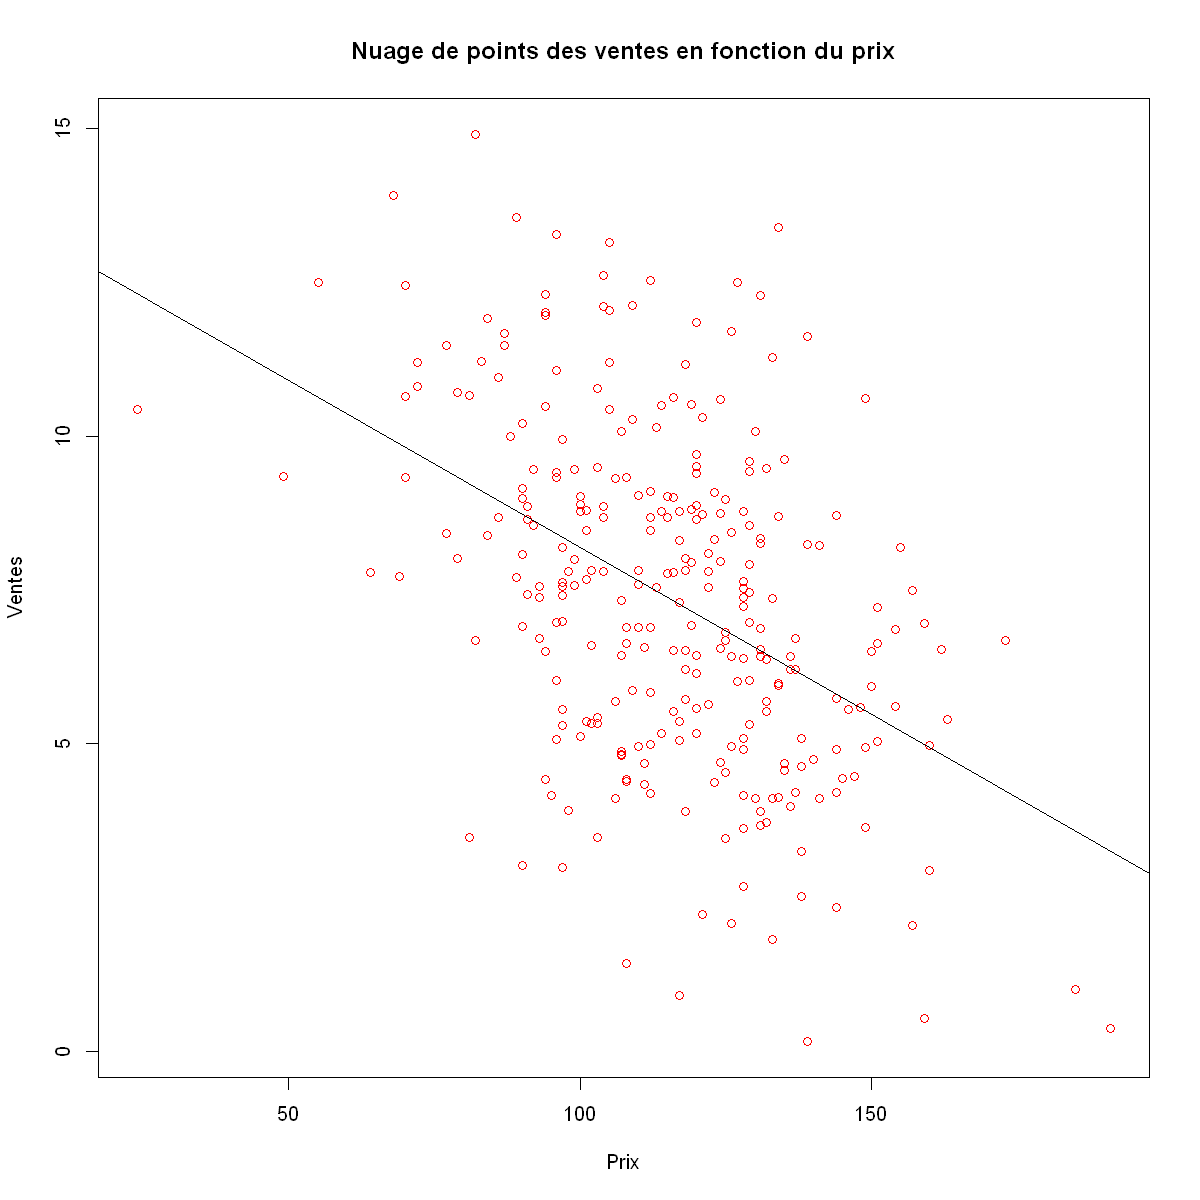

In [30]:
plot(alldata$Price, alldata$Sales, main="Nuage de points des ventes en fonction du prix", xlab="Prix", ylab="Ventes", col="#ff0000")
abline(linModel1)

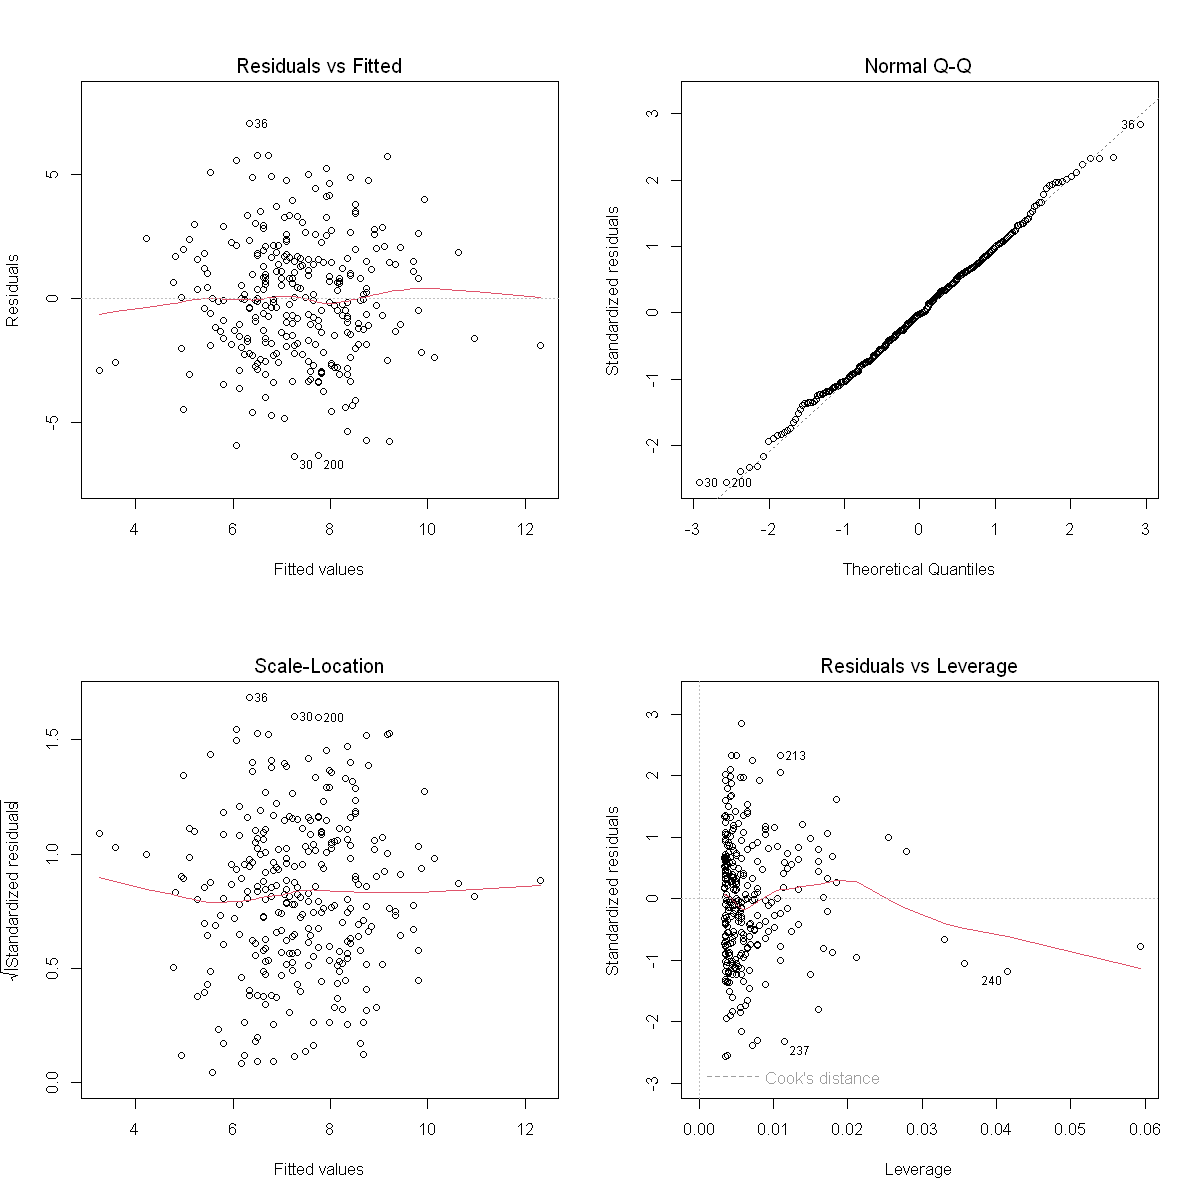

In [31]:
par(mfrow = c(2,2)) 
plot(linModel1)

__Test significativité du modèle 1 :__    
Hypothèse $H_0 : \beta_1 = 0$ et $H_1 : \beta_1 \neq 0$  
On a p-value = 1.405e-15 < $\alpha = 0.05$ On rejete $H_0$  
On à donc que le modèle est significatif au seuil $\alpha = 5$%

__Évaluation validité du modèle 1  :__    
Le modèle n'est pas très valide car R² = 0.1989 or plus R² est proche de 1, plus la variabilité des valeurs est expliqué par le modèle. 

__Analyse des résidus du modèle 1 :__  
- Les résidus suivent la droite de normalité, l'hypothèse de normalité est donc respectée. 
- Les résidus sont répartis de façon homogène autour de 0 dans l'intervalle [4, 10] et on a une homoscédasticité des valeurs qui est valide.
- le modèle à trois point atipiques qui peuvent fausser le modèle. On peut les supprimer pour améliorer le modèle.

Intervale de confiance $\beta_0$ et $\beta_1$ :

In [32]:
confint(linModel1)

,2.5 %,97.5 %
(Intercept),12.12653560,15.0994715
alldata$Price,-0.06686684,-0.0416163


À 95% on a $\beta_0 \in [12.12653560, 15.0994715]$ et $\beta_1 \in [-0.06686684, -0.0416163]$.  
<br>
<br>


#### Modèle 2 --- $Y = \beta_0 X_1^{\beta_1} e^{\epsilon}$  
Équation transformée : $ln(Y) = ln(\beta_0) + \beta_1 ln(X_1) + \epsilon$


In [33]:
linModel2 <- lm(log(alldata$Sales) ~ log(alldata$Price))
summaryLinModel2 <- summary(linModel2)

Tableau coefficient de regression


In [34]:
summaryLinModel2$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),6.3098729,0.6219687,10.145000,7.067442e-21
log(alldata$Price),-0.9342511,0.1314195,-7.108923,9.246652e-12


Tableau analyse de variance

In [35]:
anova(linModel2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(alldata$Price),1,12.23232,12.2323191,50.53679,9.246652e-12
Residuals,288,69.70976,0.2420478,NA,NA


Tester la signification du modèle

In [36]:
summaryLinModel2


Call:
lm(formula = log(alldata$Sales) ~ log(alldata$Price))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5324 -0.1867  0.0811  0.2980  0.8604 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          6.3099     0.6220  10.145  < 2e-16 ***
log(alldata$Price)  -0.9343     0.1314  -7.109 9.25e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.492 on 288 degrees of freedom
Multiple R-squared:  0.1493,	Adjusted R-squared:  0.1463 
F-statistic: 50.54 on 1 and 288 DF,  p-value: 9.247e-12


Nuage de point du modèle 2

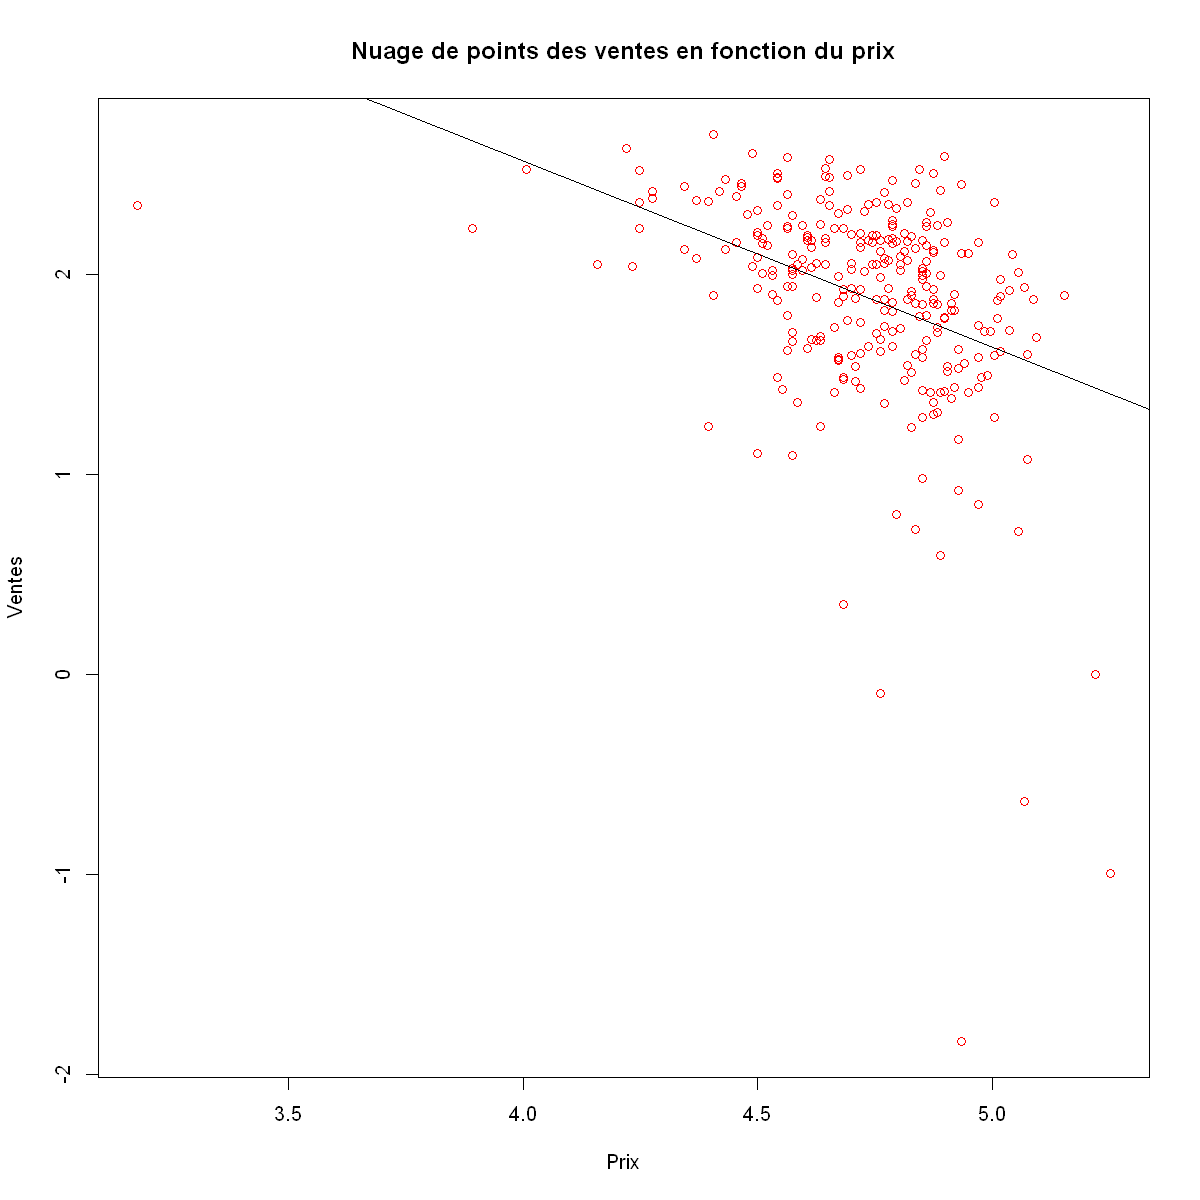

In [37]:
plot(log(alldata$Price), log(alldata$Sales), main="Nuage de points des ventes en fonction du prix", xlab="Prix", ylab="Ventes", col="#ff0000")
abline(linModel2)

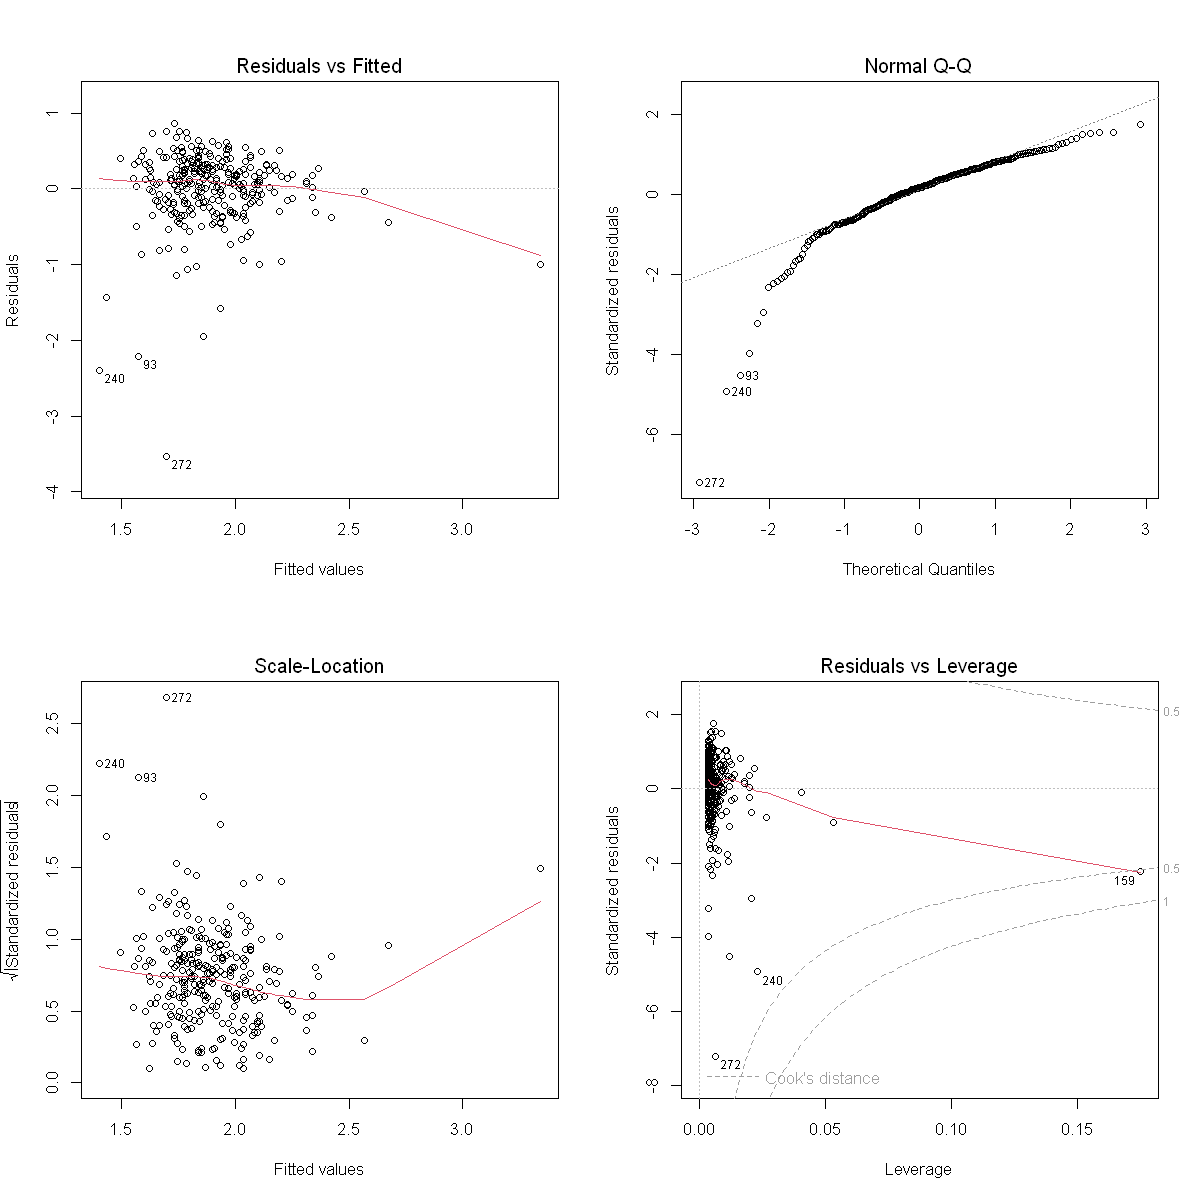

In [38]:
par(mfrow = c(2,2))
plot(linModel2)

__Test significativité du modèle 1 :__    
Hypothèse $H_0 : \beta_1 = 0$ et $H_1 : \beta_1 \neq 0$  
On a p-value = 9.247e-12 < $\alpha = 0.05$ On rejete $H_0$  
On à donc que le modèle est significatif au seuil $\alpha = 5$%

__Évaluation validité du modèle 1  :__    
Le modèle n'est pas très valide car R² = 0.1493 or plus R² est proche de 1, plus la variabilité des valeurs est expliqué par le modèle.  

__Analyse des résidus du modèle 1 :__  
- Les résidus suivent assez bien la droite de normalité, l'hypothèse de normalité est donc respectée. 
- Les résidus sont répartis de façon homogène autour de la droite dans l'intervalle [1.5, 2.5] 
- L'homoscédasticité des valeurs n'est très bonne car on observe une forme d'entonnoire vers la fin de l'intervalle
- le modèle à trois point atipiques qui peuvent fausser le modèle. On peut les supprimer pour améliorer le modèle.


Intervale de confiance $\beta_0$ et $\beta_1$ :

In [41]:
confint(linModel2)

,2.5 %,97.5 %
(Intercept),5.085692,7.5340537
log(alldata$Price),-1.192916,-0.6755866


À 95% on a $\beta_0 \in [5.085692	, 7.5340537]$ et $\beta_1 \in [-1.192916, -0.6755866]$.  
<br>
<br>

#### Modèle 3 --- $Y = \beta_0 e^{\beta_1 X_1 + \epsilon}$  
Équation transformée : $ln(Y) = ln(\beta_0) + \beta_1 X_1 + \epsilon$

In [42]:
linModel3 <- lm(log(alldata$Sales) ~ alldata$Price)
summaryLinModel3 <- summary(linModel3)

Tableau coefficient de regression

In [43]:
summaryLinModel3$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.042869143,0.146882873,20.716296,5.317899e-59
alldata$Price,-0.009952482,0.001247545,-7.977651,3.551069e-14


Tableau analyse de variance 

In [44]:
anova(linModel3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
alldata$Price,1,14.83048,14.8304793,63.64291,3.551069e-14
Residuals,288,67.11160,0.2330264,NA,NA


Tester la signification du modèle

In [45]:
summaryLinModel3


Call:
lm(formula = log(alldata$Sales) ~ alldata$Price)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4921 -0.1880  0.0783  0.2792  0.8853 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.042869   0.146883  20.716  < 2e-16 ***
alldata$Price -0.009952   0.001248  -7.978 3.55e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4827 on 288 degrees of freedom
Multiple R-squared:  0.181,	Adjusted R-squared:  0.1781 
F-statistic: 63.64 on 1 and 288 DF,  p-value: 3.551e-14


Nuage de point du modèle 3

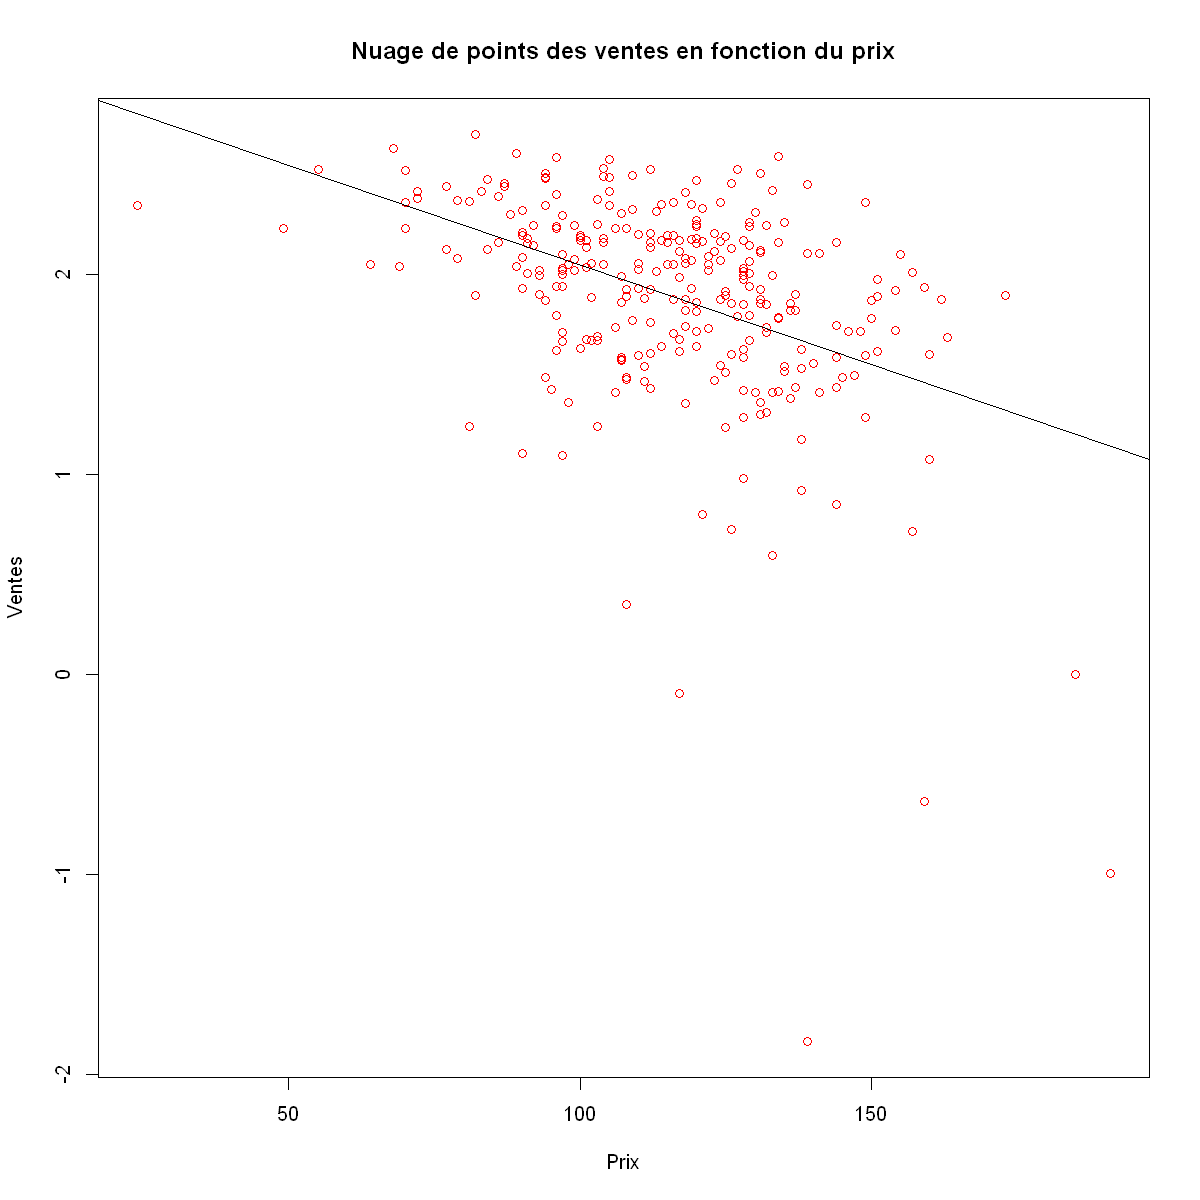

In [46]:
plot(alldata$Price, log(alldata$Sales), main="Nuage de points des ventes en fonction du prix", xlab="Prix", ylab="Ventes", col="#ff0000")
abline(linModel3)

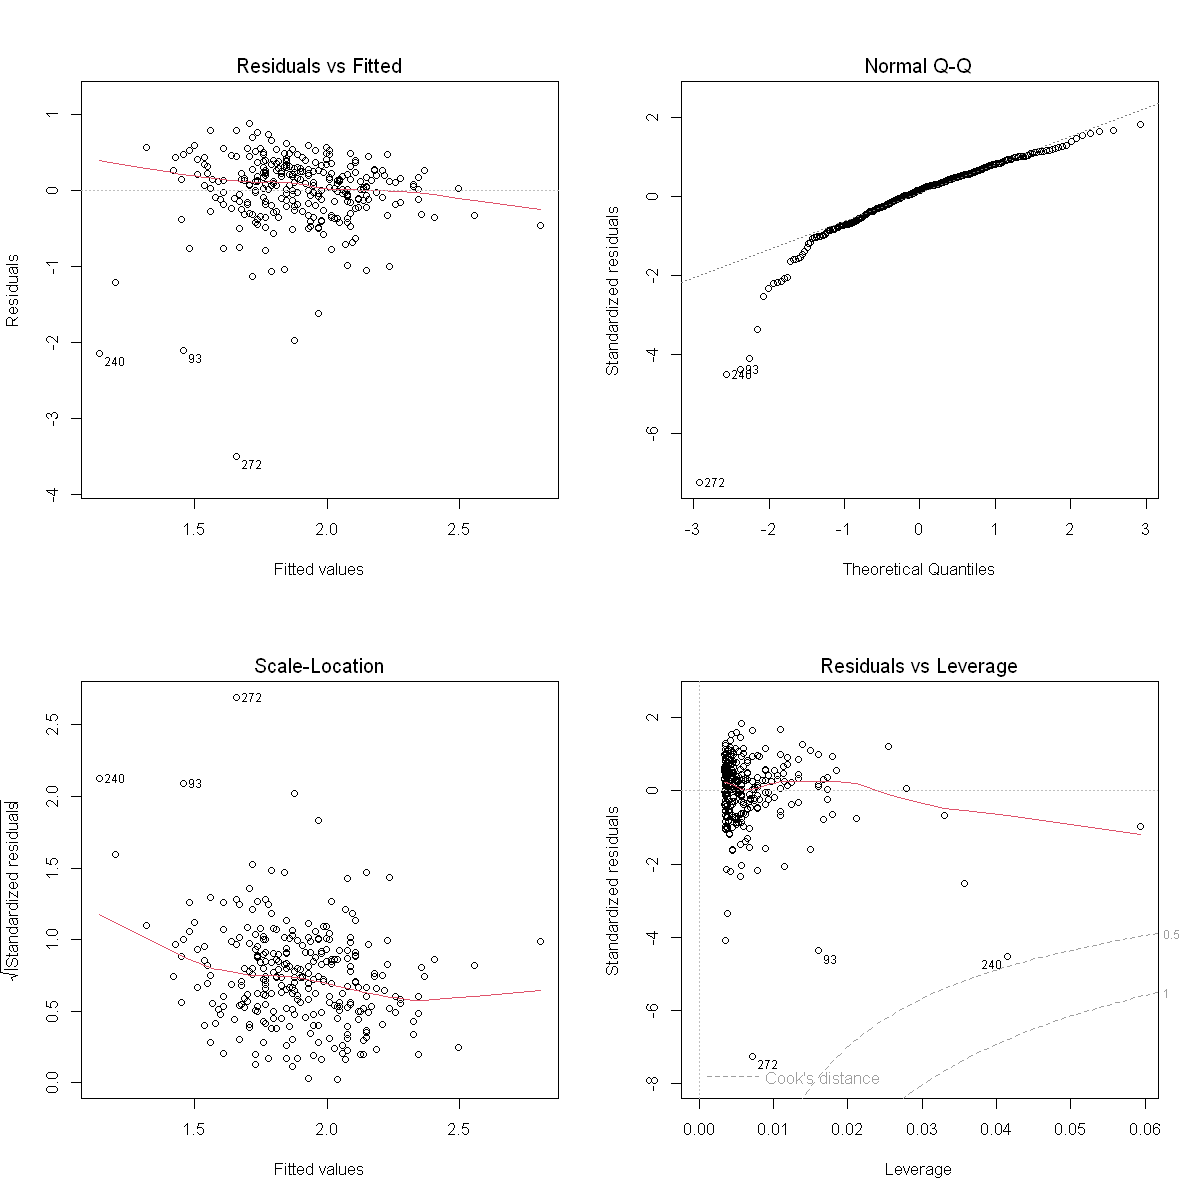

In [47]:
par(mfrow = c(2,2))
plot(linModel3)

{AJOUTER ANALYSE ICI}

Intervale de confiance $\beta_0$ et $\beta_1$ :

In [48]:
confint(linModel3)

,2.5 %,97.5 %
(Intercept),2.75376911,3.331969180
alldata$Price,-0.01240794,-0.007497019


À 95% on a $\beta_0 \in [2.75376911, 3.331969180]$ et $\beta_1 \in [-0.01240794, -0.007497019]$.  
<br>
<br>


#### Modèle 4 --- $Y = \beta_0 + \beta_1 X_2 + \epsilon$

In [49]:
linModel4 <- lm(alldata$Sales~ alldata$Advertising)
summaryLinModel4 <- summary(linModel4)

Tableau coefficient de regression

In [50]:
summaryLinModel4$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),6.4980701,0.21487458,30.241223,2.235988e-91
alldata$Advertising,0.1391349,0.02449436,5.680283,3.287081e-08


Tableau analyse de variance 

In [51]:
anova(linModel4)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
alldata$Advertising,1,223.1283,223.128306,32.26562,3.287081e-08
Residuals,288,1991.6230,6.915358,NA,NA


Tester la signification du modèle

In [52]:
summaryLinModel4


Call:
lm(formula = alldata$Sales ~ alldata$Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5825 -1.9646  0.0319  1.6669  8.4019 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          6.49807    0.21487   30.24  < 2e-16 ***
alldata$Advertising  0.13913    0.02449    5.68 3.29e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.63 on 288 degrees of freedom
Multiple R-squared:  0.1007,	Adjusted R-squared:  0.09762 
F-statistic: 32.27 on 1 and 288 DF,  p-value: 3.287e-08


Nuage de point du modèle 4

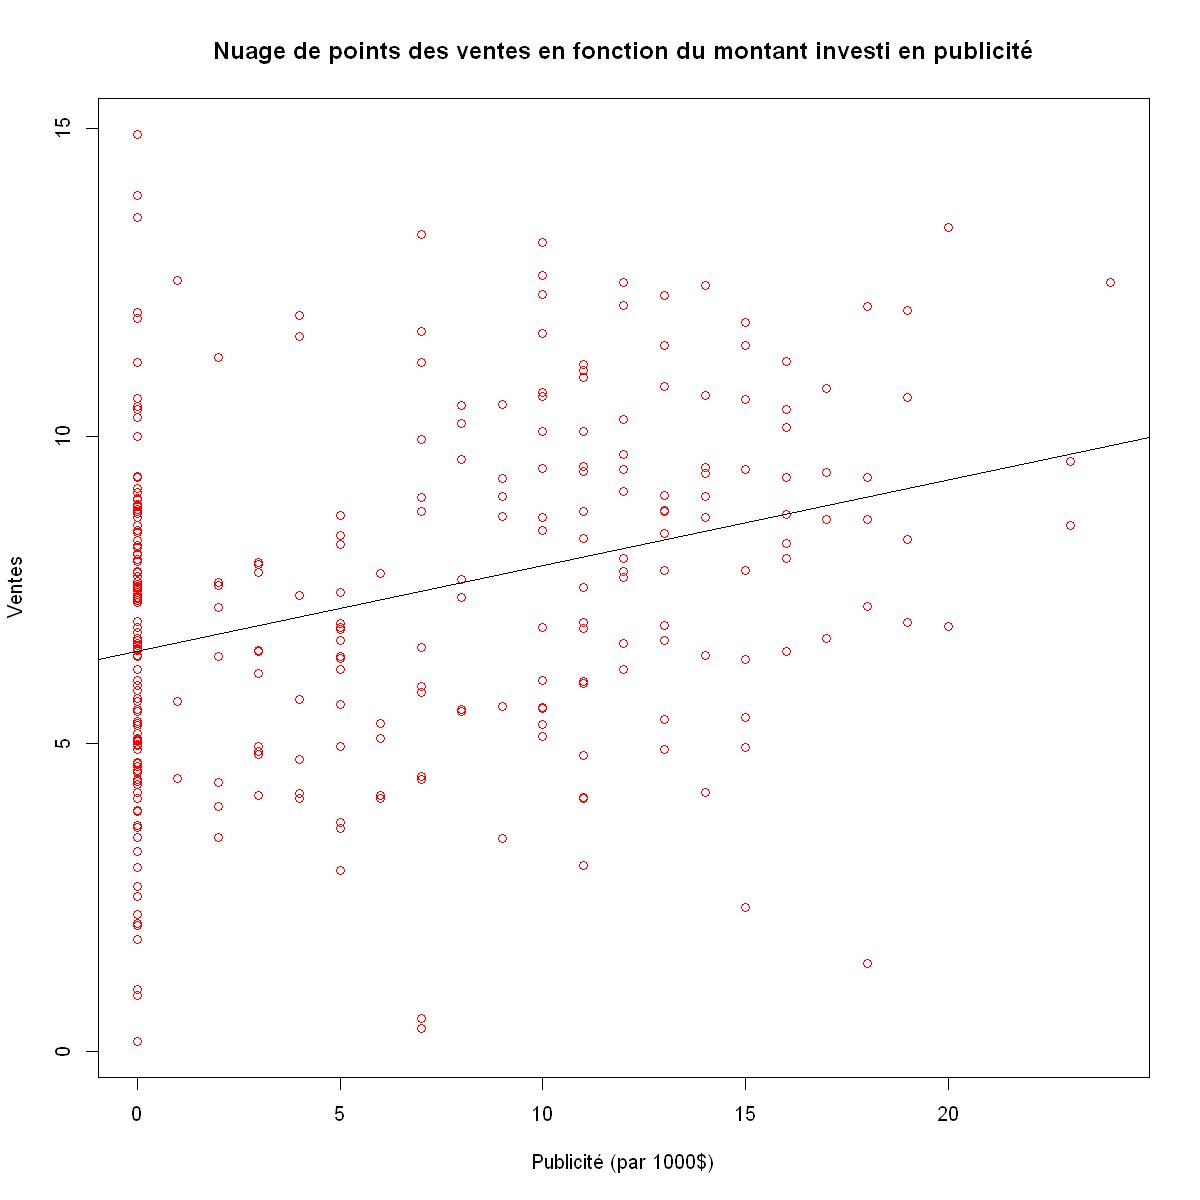

In [53]:
plot(alldata$Advertising, alldata$Sales, main="Nuage de points des ventes en fonction du montant investi en publicité", xlab="Publicité (par 1000$)", ylab="Ventes", col="#ff0000")
abline(linModel4)

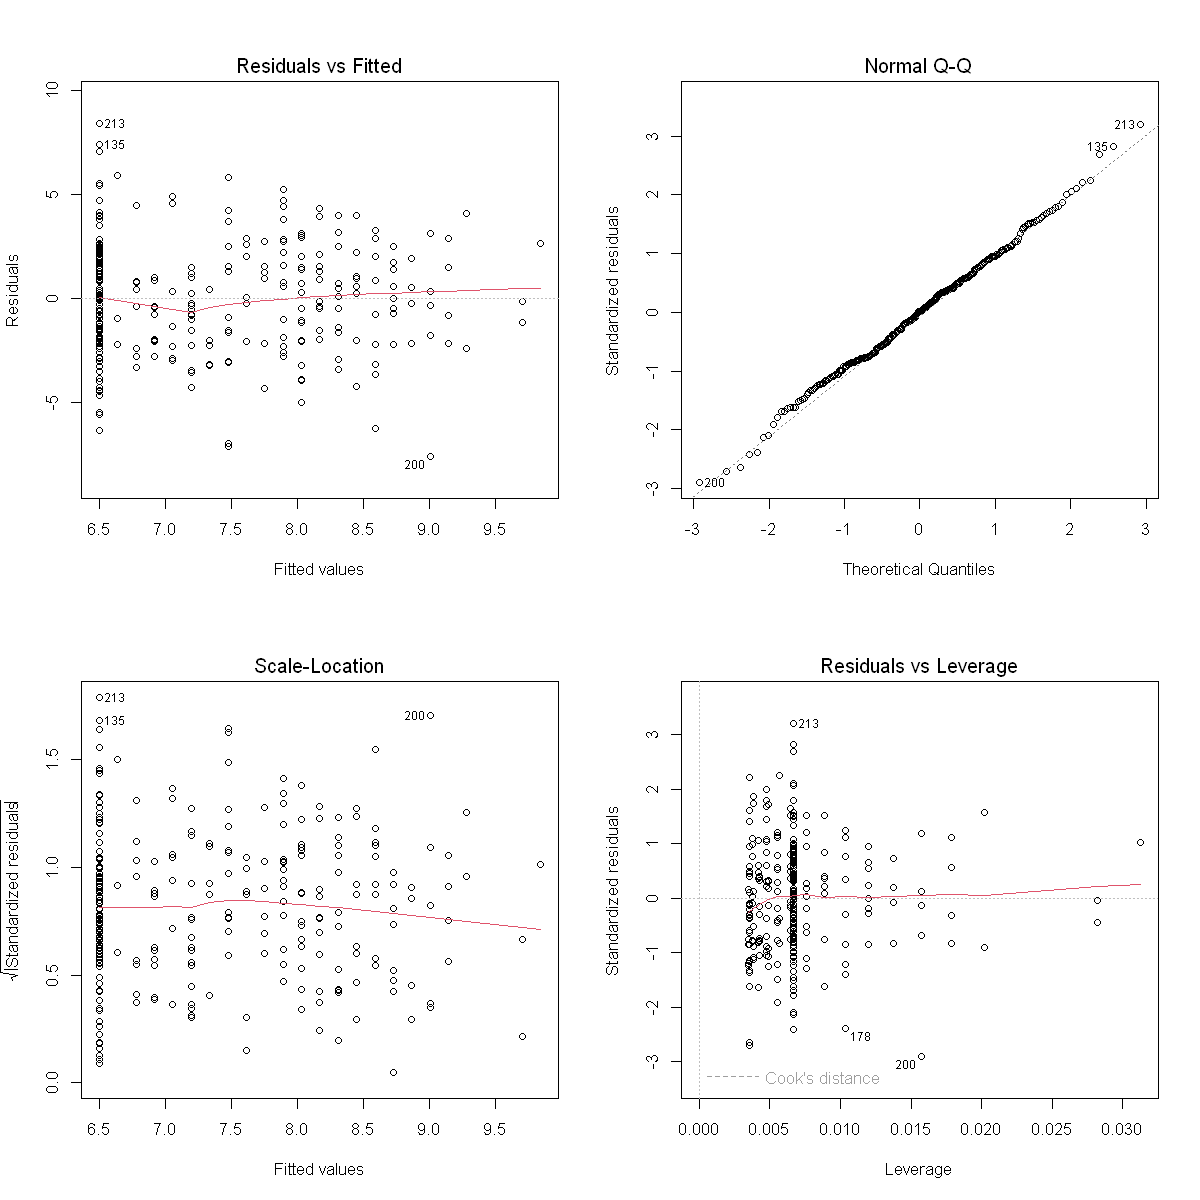

In [54]:
par(mfrow = c(2,2)) 
plot(linModel4)


{AJOUTER ANALYSE ICI}

Intervale de confiance $\beta_0$ et $\beta_1$ :

In [55]:
confint(linModel4)

,2.5 %,97.5 %
(Intercept),6.07514639,6.9209938
alldata$Advertising,0.09092425,0.1873456


À 95% on a $\beta_0 \in [6.07514639, 6.9209938]$ et $\beta_1 \in [0.09092425, 0.1873456]$.  
<br>
<br>


#### Modèle 5 --- $Y = \beta_0 (8 + X_2)^{\beta_1} e^{\epsilon}$  
Équation transformée : $ln(Y) = ln(\beta_0) + \beta_1 ln(8 + X_2) + \epsilon$

In [56]:
linModel5 <- lm(log(alldata$Sales) ~ log(8 + alldata$Advertising))
summaryLinModel5 <- summary(linModel5)

Tableau coefficient de regression

In [57]:
summaryLinModel5$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.1306187,0.17784113,6.357464,8.014355e-10
log(8 + alldata$Advertising),0.2992487,0.06877191,4.351322,1.881166e-05


Tableau analyse de variance

In [58]:
anova(linModel5)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(8 + alldata$Advertising),1,5.054805,5.0548045,18.934,1.881166e-05
Residuals,288,76.887279,0.2669697,NA,NA


Tester la signification du modèle

In [59]:
summaryLinModel5


Call:
lm(formula = log(alldata$Sales) ~ log(8 + alldata$Advertising))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5855 -0.2091  0.1046  0.3019  0.9485 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.13062    0.17784   6.357 8.01e-10 ***
log(8 + alldata$Advertising)  0.29925    0.06877   4.351 1.88e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5167 on 288 degrees of freedom
Multiple R-squared:  0.06169,	Adjusted R-squared:  0.05843 
F-statistic: 18.93 on 1 and 288 DF,  p-value: 1.881e-05


Nuage de point du modèle 5

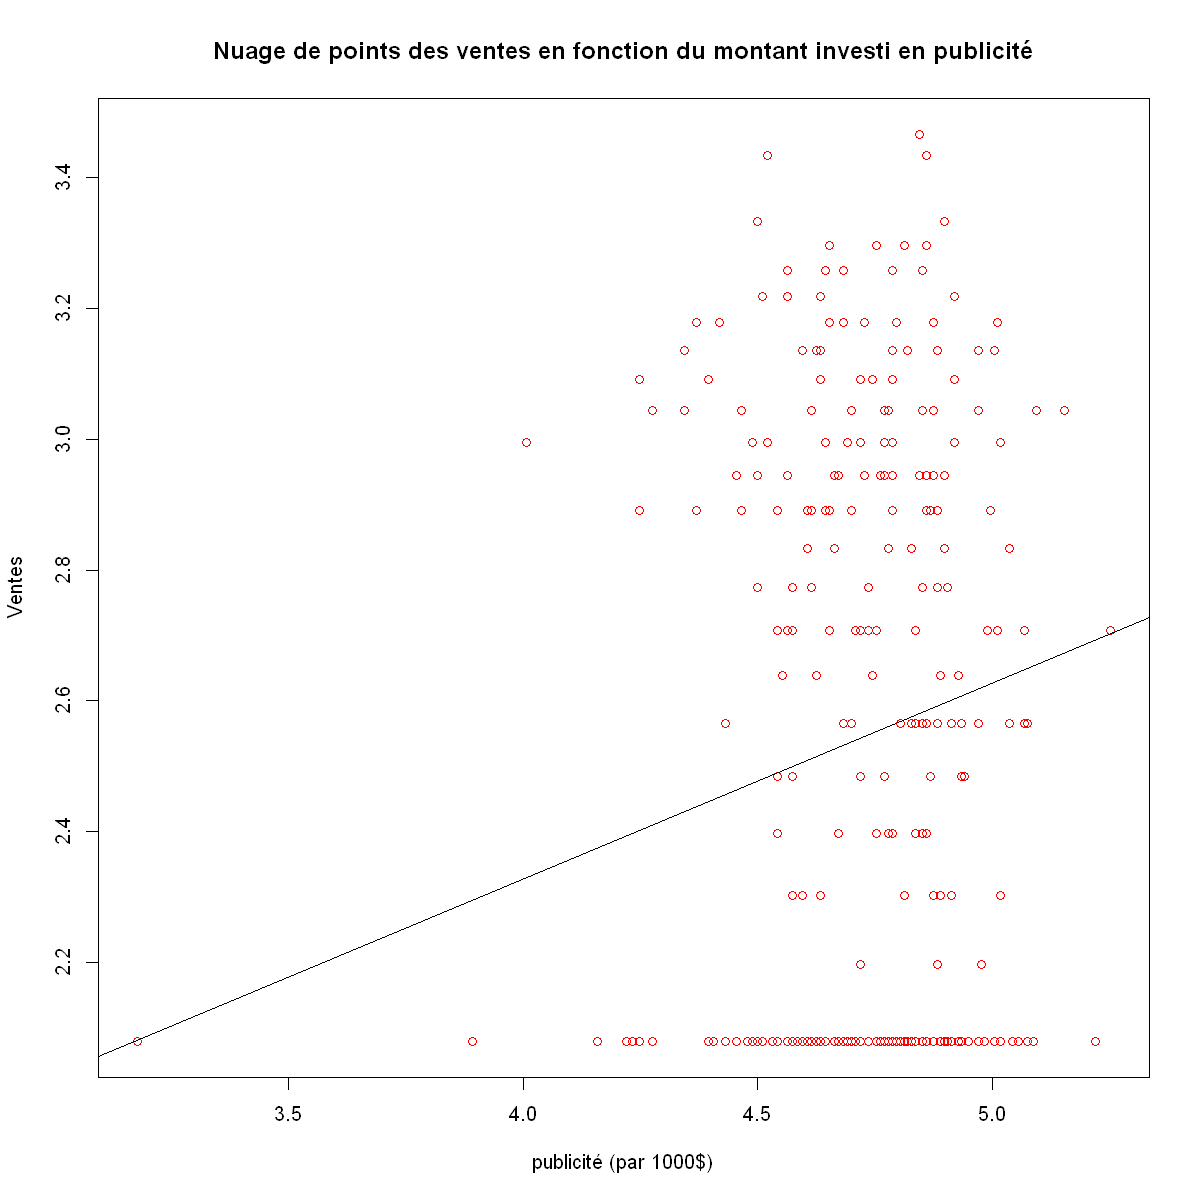

In [60]:
plot(log(alldata$Price), log(alldata$Advertising + 8), main="Nuage de points des ventes en fonction du montant investi en publicité", xlab="publicité (par 1000$)", ylab="Ventes", col="#ff0000")
abline(linModel5)

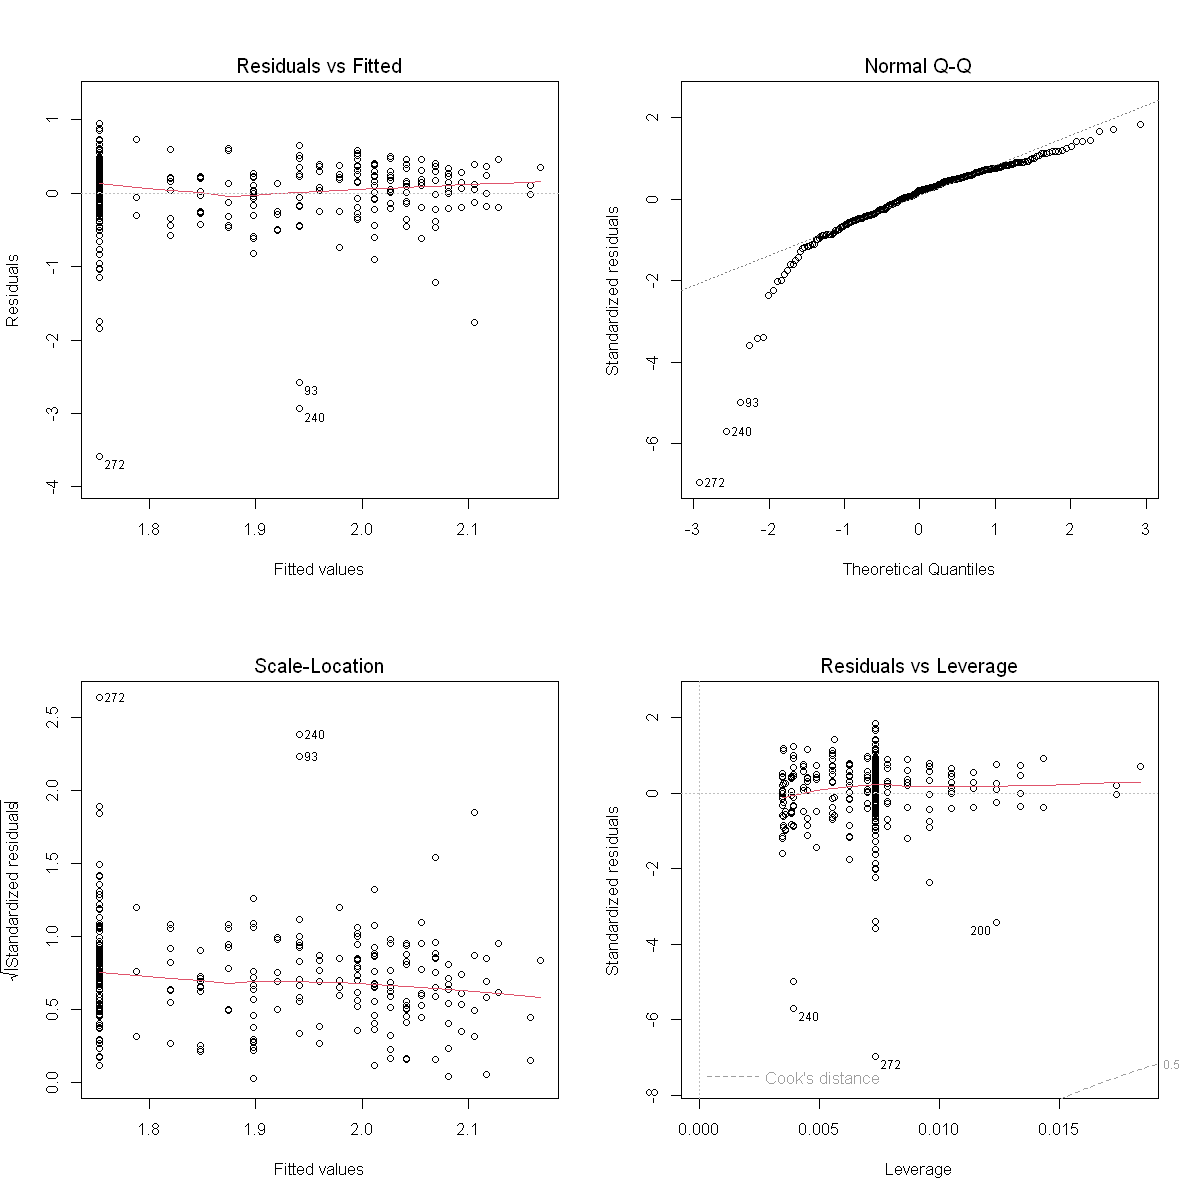

In [61]:
par(mfrow = c(2,2))
plot(linModel5)

{AJOUTER ANALYSE ICI}

Intervale de confiance $\beta_0$ et $\beta_1$ :

In [62]:
confint(linModel5)

,2.5 %,97.5 %
(Intercept),0.7805855,1.480652
log(8 + alldata$Advertising),0.1638894,0.434608


À 95% on a $\beta_0 \in [0.7805855, 1.480652]$ et $\beta_1 \in [0.1638894, 0.434608]$.  
<br>
<br>


#### Modèle 6 --- $Y = \beta_0 e^{\beta_1 X_2 + \epsilon}$  
Équation transformée : $ln(Y) = ln(\beta_0) + \beta_1 X_2 + \epsilon$

In [63]:
linModel6 <- lm(log(alldata$Sales) ~ alldata$Advertising)
summaryLinModel6 <- summary(linModel6)

Tableau coefficient de regression

In [64]:
summaryLinModel6$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.76096128,0.042121447,41.806762,2.507499e-124
alldata$Advertising,0.02166491,0.004801582,4.512036,9.362909e-06


Tableau analyse de variance

In [65]:
anova(linModel6)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
alldata$Advertising,1,5.409986,5.4099865,20.35847,9.362909e-06
Residuals,288,76.532097,0.2657364,NA,NA


Tester la signification du modèle

In [66]:
summaryLinModel6


Call:
lm(formula = log(alldata$Sales) ~ alldata$Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5935 -0.2190  0.0962  0.3005  0.9404 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.760961   0.042121  41.807  < 2e-16 ***
alldata$Advertising 0.021665   0.004802   4.512 9.36e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5155 on 288 degrees of freedom
Multiple R-squared:  0.06602,	Adjusted R-squared:  0.06278 
F-statistic: 20.36 on 1 and 288 DF,  p-value: 9.363e-06


Nuage de point du modèle 6

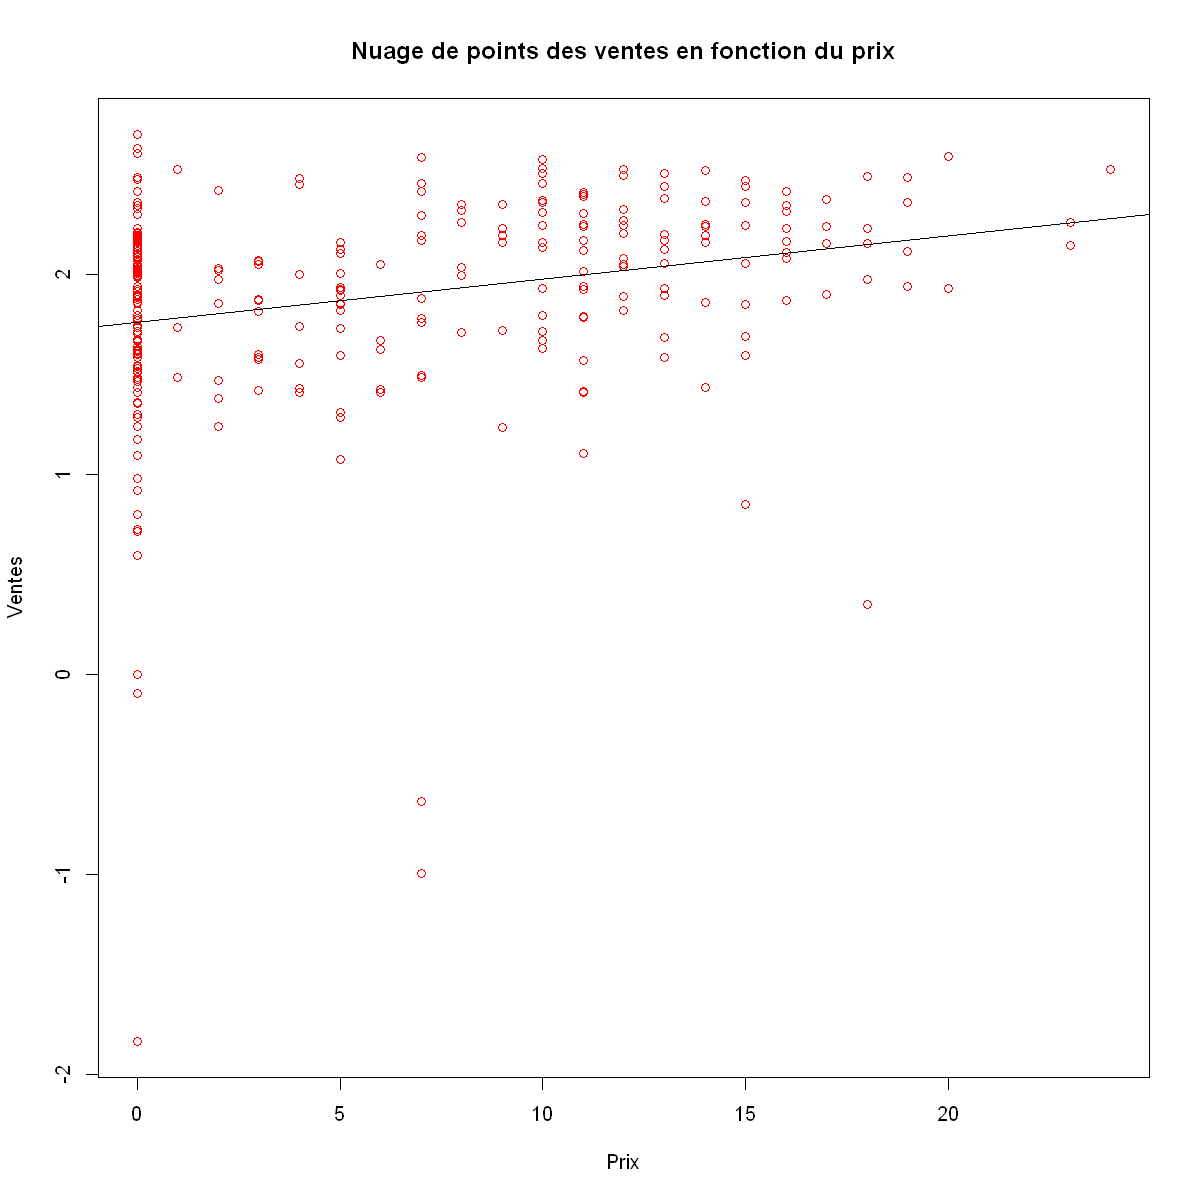

In [67]:
plot(alldata$Advertising, log(alldata$Sales), main="Nuage de points des ventes en fonction du prix", xlab="Prix", ylab="Ventes", col="#ff0000")
abline(linModel6)

{AJOUTER ANALYSE ICI}

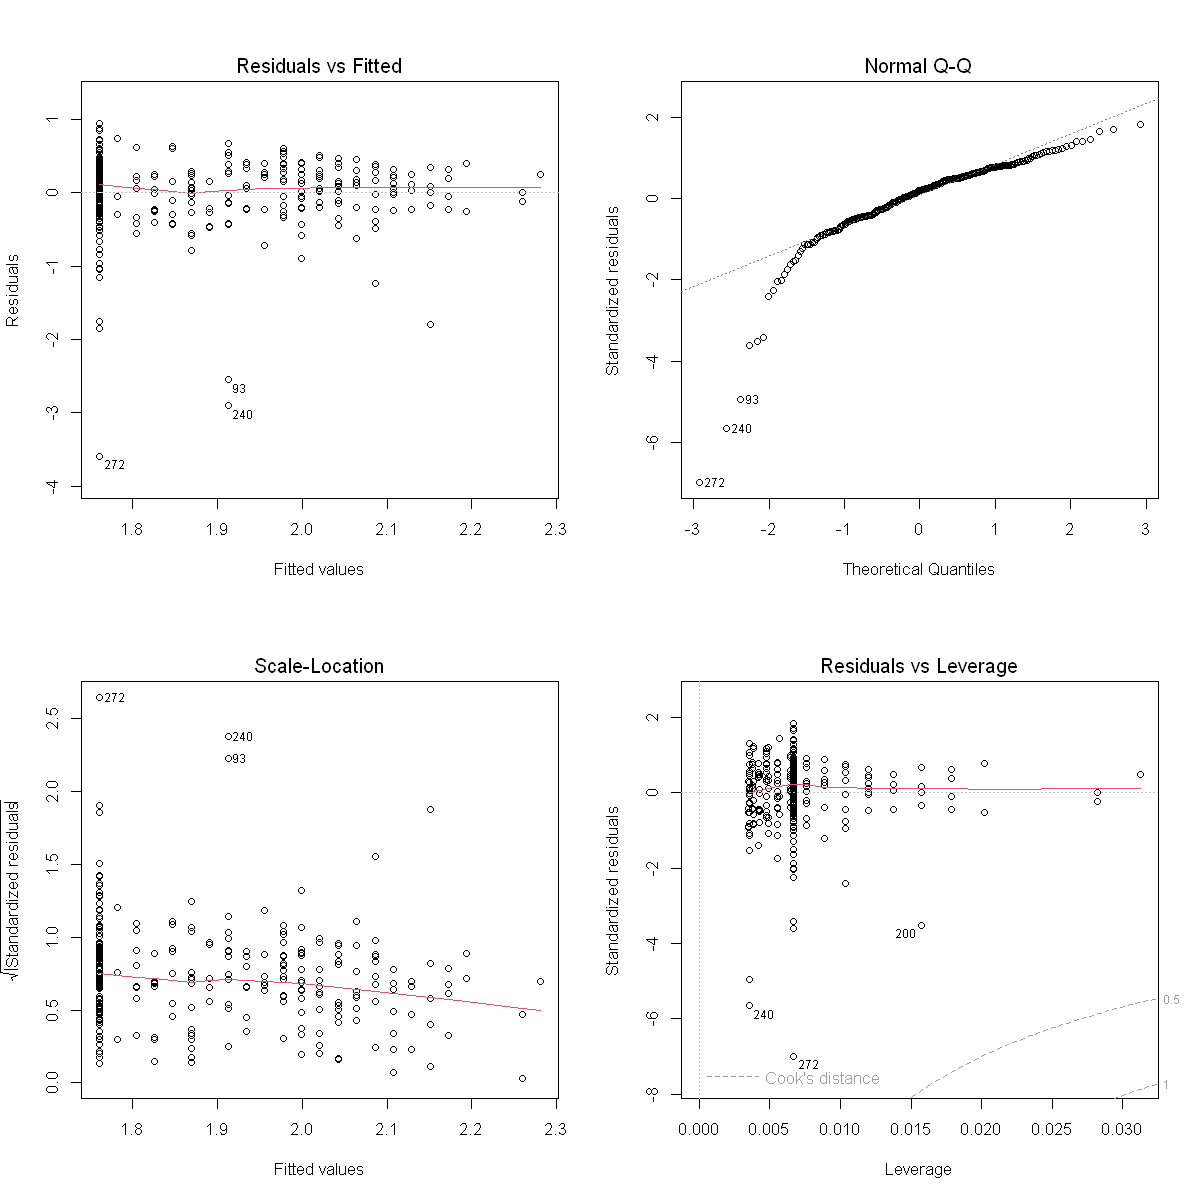

In [68]:
par(mfrow = c(2,2))
plot(linModel6)

Intervale de confiance $\beta_0$ et $\beta_1$ :

In [69]:
confint(linModel6)

,2.5 %,97.5 %
(Intercept),1.67805637,1.84386620
alldata$Advertising,0.01221427,0.03111555


À 95% on a $\beta_0 \in [1.67805637, 1.84386620]$ et $\beta_1 \in [0.01221427, 0.03111555]$.  
<br>
<br>
